car acceleration

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_excel('cars_acceleration_regression_simple.xlsx')

In [3]:
df.head()

,horesepower,acceleration
0,140,16.0
1,67,16.0
2,68,16.6
3,81,16.9
4,97,15.0


In [7]:
df.isnull().value_counts()

horesepower  acceleration
False        False           230
dtype: int64

In [8]:
df.dtypes

horesepower       int64
acceleration    float64
dtype: object

<AxesSubplot:xlabel='horesepower', ylabel='acceleration'>

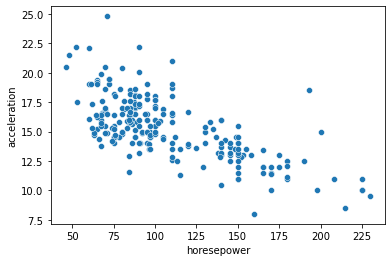

In [6]:
sns.scatterplot(data=df, x="horesepower", y="acceleration")

Le Scatterplot nous permet de voir qu'il y  a une correlation entre les deux variables

In [14]:
corr=df['horesepower'].corr(df['acceleration'])
print('Ce que nous confirmons avec le calcul de corrélation entre les deux variables')
print('Le coefficient de corrération est :'+ str(corr))

Ce que nous confirmons avec le calcul de corrélation entre les deux variables
Le coefficient de corrération est :-0.6839872119281634


Nous allons séparer le dataset en deux afin de faire une partie de test et une partie d'entrainement

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Travaillons maintenant sur train afin d'entrainer un modèle de régressionb linéaire afin de prédire l'accélération en fonction de la puissance

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['horesepower']])
y = np.asanyarray(train[['acceleration']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.04470256]]


In [21]:
y_hat= regr.predict(test[['horesepower']])
x = np.asanyarray(test[['horesepower']])
y = np.asanyarray(test[['acceleration']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 3.01
Variance score: 0.59


Regplot de la partie train


<AxesSubplot:xlabel='horesepower', ylabel='acceleration'>

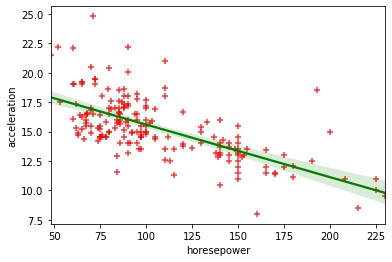

In [28]:
print('Regplot de la partie train')
sns.regplot(x='horesepower', y='acceleration', data=train, color='red', marker="+", line_kws={"color": "green"})
